<a href="https://colab.research.google.com/github/CEN546PROJECT/ImageSegmentationMethods/blob/master/Image_Segmentation_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation

##1. Thresholding

In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries 

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from skimage.metrics import (adapted_rand_error,variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour, inverse_gaussian_gradient,
                                  watershed, mark_boundaries)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


(300, 300, 3)


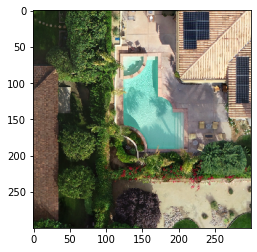

In [0]:
path0 = '/content/gdrive/My Drive/CEN546-Project/sample_images/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(image.shape)
plt.imshow(image)

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]


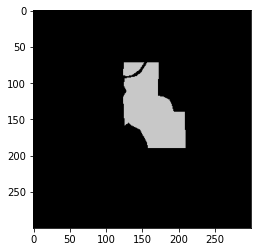

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
GT.shape
image_grount_truth = GT[:,:,0]
GT = np.round(GT*1000)/4
GT = GT.astype('int')
print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

plt.imshow((GT==3)*200)

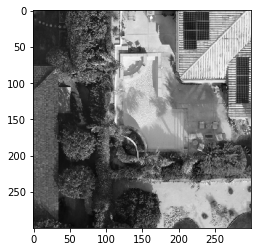

In [0]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [0]:
gray.shape

(300, 300)

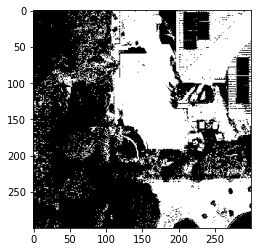

In [0]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

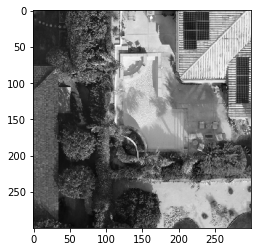

In [0]:
gray_original = rgb2gray(image)
plt.imshow(gray_original, cmap='gray')

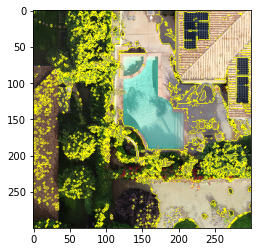

In [0]:
img_test_g_thr = ndi.label(gray)[0]
plt.imshow(mark_boundaries(image, img_test_g_thr))

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]
[[1 2 0 ... 4 0 0]
 [3 2 2 ... 4 0 0]
 [1 2 0 ... 4 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


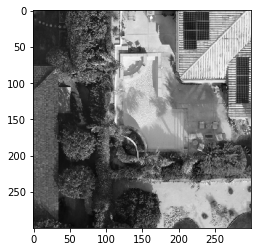

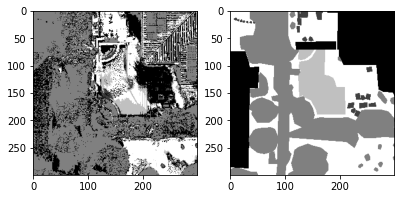

In [0]:
gray_original = rgb2gray(image)
plt.imshow(gray_original, cmap='gray')
gray_r = gray_original.copy()
gray_r = gray_original.reshape(gray_original.shape[0]*gray_original.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] >  220/255:
        gray_r[i] = 0 #BUILDING 
    elif gray_r[i] > 170/255:
        gray_r[i] = 4  #GROUND
    elif gray_r[i] > 140/255:  # 140 to 170
        gray_r[i] = 3  # WATER
    elif gray_r[i] > 130/255:
        gray_r[i] = 1  # CLUTTER
    elif gray_r[i] > 90/255:
        gray_r[i] = 0 #BUILDING
    elif gray_r[i] > 20/255:
        gray_r[i] = 2  #VEGETATION
    else:
        gray_r[i] = 0
gray_resut = gray_r.reshape(gray.shape[0],gray.shape[1])
gray_resut = gray_resut.astype('int')

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(gray_resut*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,2]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
print(gray_resut)

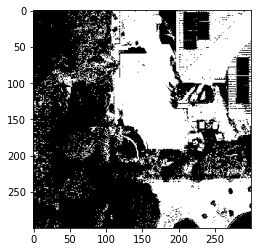

In [0]:
plt.imshow(gray, cmap='gray')

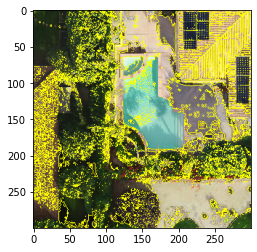

In [0]:
img_test_l_thr = ndi.label(gray_resut)[0]
plt.imshow(mark_boundaries(image, img_test_l_thr))

##2. Image Segmentation based on Clustering

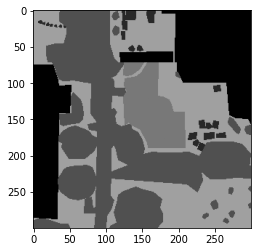

In [0]:
path = path0+'label-chips/'
TT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
TT.shape
plt.imshow(TT*40)
image_grount_truth = TT[:,:,0]

In [0]:
image_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
image_n.shape

(90000, 3)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(image_n)
image2show = kmeans.cluster_centers_[kmeans.labels_]

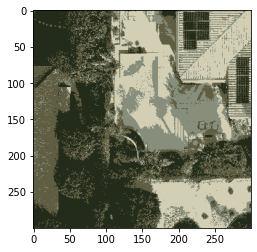

In [0]:
cluster_image = image2show.reshape(image.shape[0], image.shape[1], image.shape[2])
plt.imshow(cluster_image)

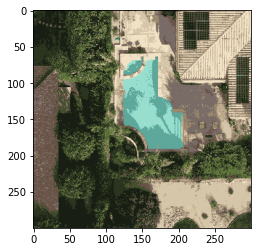

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0).fit(image_n)
image2show = kmeans.cluster_centers_[kmeans.labels_]

cluster_image = image2show.reshape(image.shape[0], image.shape[1], image.shape[2])
plt.imshow(cluster_image)

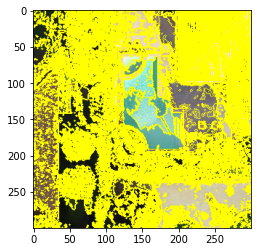

In [0]:
img_test_kmeans = kmeans.labels_.reshape(image.shape[0], image.shape[1])
plt.imshow(mark_boundaries(image, img_test_kmeans))

In [0]:
# MeanShift segmentation
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Z = np.float32(img.reshape((-1,3)))

# img = cv2.pyrMeanShiftFiltering(img, 20, 30, 2)
# img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

# plt.imshow(img)
# plt.show()

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]


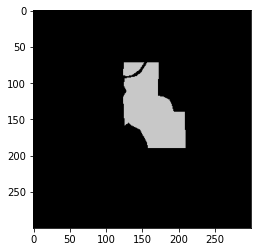

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
GT.shape
image_grount_truth = GT[:,:,0]
GT = np.round(GT*1000)/4
GT = GT.astype('int')
print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

plt.imshow((GT==3)*200)

In [0]:
image_reshaped = np.reshape(image , ( image.shape[0]* image.shape[1] , image.shape[2]))
print('image_reshaped shape: ' , image_reshaped.shape)

image_reshaped shape:  (90000, 3)


In [0]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(image_reshaped, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(image_reshaped)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# ##########################

number of estimated clusters : 4


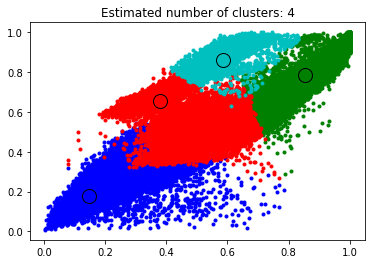

In [0]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(image_reshaped[my_members, 0], image_reshaped[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

(90000,)


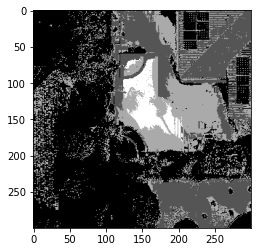

In [0]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

print(labels.shape)
image_segmented = np.reshape(labels, (image.shape[0] , image.shape[1] )  )

plt.imshow(image_segmented*40  , cmap='gray')

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]
[[2 0 0 ... 1 1 1]
 [2 0 0 ... 1 1 1]
 [2 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


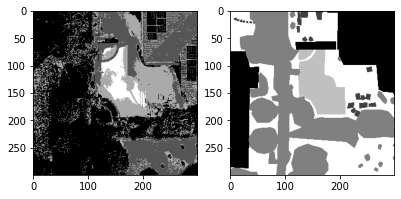

In [0]:
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,2]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
print(image_segmented)

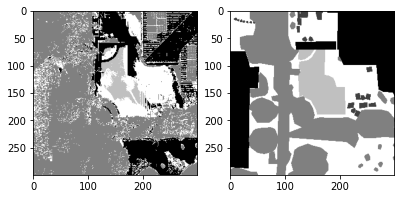

In [0]:
image_segmented_new = np.zeros(image_segmented.shape)
idx = image_segmented==2
image_segmented_new[idx] = 4
idx = image_segmented==0
image_segmented_new[idx] = 2
idx = image_segmented==1
image_segmented_new[idx] = 0
idx = image_segmented==3
image_segmented_new[idx] = 3
image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6


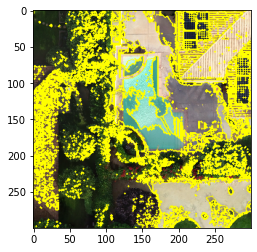

In [0]:
img_test_meanshift = image_segmented_new.copy()
plt.imshow(mark_boundaries(image, img_test_meanshift))

## Mask R-CNN

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 30.13 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [0]:
import os
import sys
import random
import math
import skimage.io

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

Using TensorFlow backend.


In [0]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [0]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [0]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

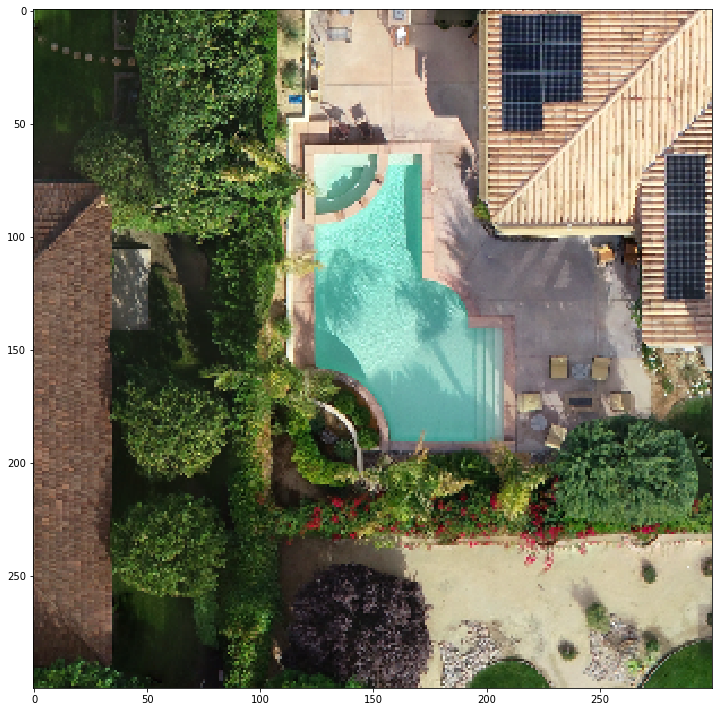

In [0]:
# Load a random image from the images folder
image_ = skimage.io.imread(path0+'image-chips/'+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image_)

Processing 1 images
image                    shape: (300, 300, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



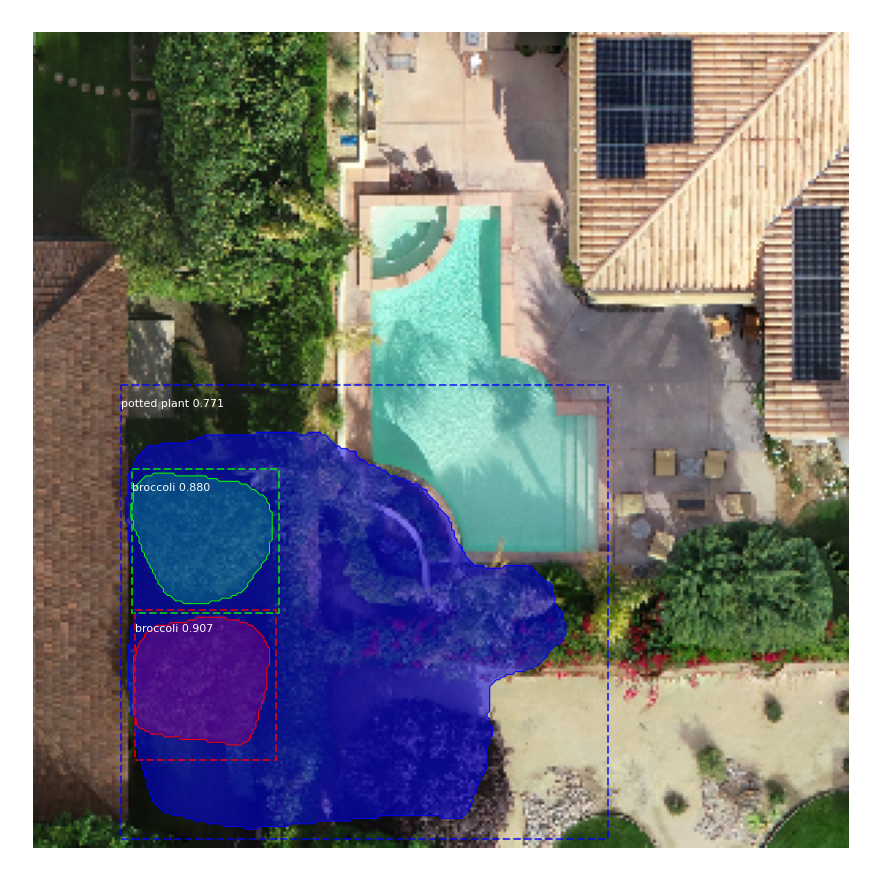

In [0]:
# Run detection
results = model.detect([image_], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image_, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(300, 300, 3)

<class 'numpy.ndarray'>
(300, 300, 3)
(300, 300)


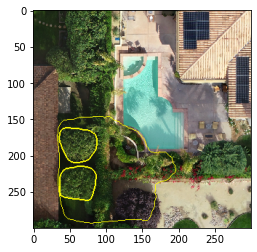

In [0]:
print(type(mask))
print(mask.shape)
img_test_mrcnn = np.zeros((mask.shape[0], mask.shape[1]), np.int32)

print(img_test_mrcnn.shape)

for i in range(mask.shape[2]):
  img_test_mrcnn += mask[:,:,i]

plt.imshow(mark_boundaries(image, img_test_mrcnn))

## FCN-for-Semantic-Segmentation

In [0]:
from keras.models import Sequential,Model
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Deconvolution2D, Cropping2D
from keras.layers import Input, Add, Dropout, Permute, add
from scipy.io import loadmat
from PIL import Image

In [0]:
# Function to create to a series of CONV layers followed by Max pooling layer
def Convblock(channel_dimension, block_no, no_of_convs) :
    Layers = []
    for i in range(no_of_convs) :
        
        Conv_name = "conv"+str(block_no)+"_"+str(i+1)
        
        # A constant kernel size of 3*3 is used for all convolutions
        Layers.append(Convolution2D(channel_dimension,kernel_size = (3,3),padding = "same",activation = "relu",name = Conv_name))
    
    Max_pooling_name = "pool"+str(block_no)
    
    #Addding max pooling layer
    Layers.append(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name = Max_pooling_name))
    
    return Layers

In [0]:
#Helper function to create Sequential part of the Architecture
def FCN_16_helper(image_size):
    model = Sequential()
    model.add(Permute((1,2,3),input_shape = (image_size,image_size,3)))
    
    
    for l in Convblock(64,1,2) :
        model.add(l)
    
    for l in Convblock(128,2,2):
        model.add(l)
    
    for l in Convblock(256,3,3):
        model.add(l)
    
    for l in Convblock(512,4,3):
        model.add(l)
    
    for l in Convblock(512,5,3):
        model.add(l)
    
    
    model.add(Convolution2D(4096,kernel_size=(7,7),padding = "same",activation = "relu",name = "fc6"))
    
    #Replacing fully connnected layers of VGG Net using convolutions
    model.add(Convolution2D(4096,kernel_size=(1,1),padding = "same",activation = "relu",name = "fc7"))
    
    
    # Gives the classifications scores for each of the 21 classes including background
    model.add(Convolution2D(21,kernel_size=(1,1),padding="same",activation="relu",name = "score_fr"))
    
    
    Conv_size = model.layers[-1].output_shape[2] #16 if image size if 512
    print(Conv_size)
    
    model.add(Deconvolution2D(21,kernel_size=(4,4),strides = (2,2),padding = "valid",activation=None,name = "score2"))
    
    # O = ((I-K+2*P)/Stride)+1 
    # O = Output dimesnion after convolution
    # I = Input dimnesion
    # K = kernel Size
    # P = Padding
    
    # I = (O-1)*Stride + K 
    Deconv_size = model.layers[-1].output_shape[2] #34 if image size is 512*512
    
    print(Deconv_size)
    # 2 if image size is 512*512
    Extra = (Deconv_size - 2*Conv_size)
    
    print(Extra)
    
    #Cropping to get correct size
    model.add(Cropping2D(cropping=((0,Extra),(0,Extra))))
    return model

In [0]:
def FCN_16(image_size) :
    fcn_16 = FCN_16_helper(image_size)
    
    #Calculating conv size after the sequential block
    #32 if image size is 512*512
    Conv_size = fcn_16.layers[-1].output_shape[2] 
    
    skip_con = Convolution2D(21,kernel_size=(1,1),padding = "same",activation=None, name = "score_pool4")
    
    #Addig skip connection which takes adds the output of Max pooling layer 4 to current layer
    Summed = add(inputs = [skip_con(fcn_16.layers[14].output),fcn_16.layers[-1].output])
        
    Up = Deconvolution2D(21,kernel_size=(32,32),strides = (16,16),padding = "valid",activation = None,name = "upsample_new")
    
    #528 if image size is 512*512
    Deconv_size = (Conv_size-1)*16+32
    
    #16 if image size is 512*512
    extra_margin = (Deconv_size - Conv_size*16)
    
    print(extra_margin)
    #Cropping to get the original size of the image
    #crop = Cropping2D(cropping = ((0,extra_margin),(0,extra_margin)))
    crop = Cropping2D(cropping = ((0,4),(0,4))) # 4 if image size is 300*300
    return Model(fcn_16.input, crop(Up(Summed)))

In [0]:
image_size = 300
fcn16_model = FCN_16(image_size)
fcn16_model.summary()

9
20
2
16
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
permute_1_input (InputLayer)    (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 300, 300, 3)  0           permute_1_input[0][0]            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 300, 300, 64) 1792        permute_1[0][0]                  
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 300, 300, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________

In [0]:
!wget https://www.vlfeat.org/matconvnet/models/pascal-fcn16s-dag.mat
# load pretrained weights
pasca_fcn16s_mat_math = 'pascal-fcn16s-dag.mat'
data = loadmat(pasca_fcn16s_mat_math, matlab_compatible=False, struct_as_record=False)
layers = data['layers']
params = data['params']
description = data['meta'][0,0].classes[0,0].description

--2020-04-15 21:41:56--  https://www.vlfeat.org/matconvnet/models/pascal-fcn16s-dag.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500215534 (477M)
Saving to: ‘pascal-fcn16s-dag.mat’

pascal-fcn16s-dag.m 100%[===================>] 477.04M  1.81MB/s    in 72s     

2020-04-15 21:43:09 (6.61 MB/s) - ‘pascal-fcn16s-dag.mat’ saved [500215534/500215534]



In [0]:
# compy weights from mat to keras model function
def copy_mat_to_keras(kmodel):
    
    kerasnames = [lr.name for lr in kmodel.layers]

    prmt = (0, 1, 2, 3) # WARNING : important setting as 2 of the 4 axis have same size dimension
    
    for i in range(0, params.shape[1]-1, 2):
        matname = '_'.join(params[0,i].name[0].split('_')[0:-1])
        if matname in kerasnames:
            kindex = kerasnames.index(matname)
            print('found : ', (str(matname), kindex))
            l_weights = params[0,i].value
            l_bias = params[0,i+1].value
            f_l_weights = l_weights.transpose(prmt)
            if False: # WARNING : this depends on "image_data_format":"channels_last" in keras.json file
                f_l_weights = np.flip(f_l_weights, 0)
                f_l_weights = np.flip(f_l_weights, 1)
            print(f_l_weights.shape, kmodel.layers[kindex].get_weights()[0].shape)
            assert (f_l_weights.shape == kmodel.layers[kindex].get_weights()[0].shape)
            assert (l_bias.shape[1] == 1)
            assert (l_bias[:,0].shape == kmodel.layers[kindex].get_weights()[1].shape)
            assert (len(kmodel.layers[kindex].get_weights()) == 2)
            kmodel.layers[kindex].set_weights([f_l_weights, l_bias[:,0]])
        else:
            print('not found : ', str(matname))

In [0]:
# copy weights to our fcn16 model
copy_mat_to_keras(fcn16_model)

found :  ('conv1_1', 2)
(3, 3, 3, 64) (3, 3, 3, 64)
found :  ('conv1_2', 3)
(3, 3, 64, 64) (3, 3, 64, 64)
found :  ('conv2_1', 5)
(3, 3, 64, 128) (3, 3, 64, 128)
found :  ('conv2_2', 6)
(3, 3, 128, 128) (3, 3, 128, 128)
found :  ('conv3_1', 8)
(3, 3, 128, 256) (3, 3, 128, 256)
found :  ('conv3_2', 9)
(3, 3, 256, 256) (3, 3, 256, 256)
found :  ('conv3_3', 10)
(3, 3, 256, 256) (3, 3, 256, 256)
found :  ('conv4_1', 12)
(3, 3, 256, 512) (3, 3, 256, 512)
found :  ('conv4_2', 13)
(3, 3, 512, 512) (3, 3, 512, 512)
found :  ('conv4_3', 14)
(3, 3, 512, 512) (3, 3, 512, 512)
found :  ('conv5_1', 16)
(3, 3, 512, 512) (3, 3, 512, 512)
found :  ('conv5_2', 17)
(3, 3, 512, 512) (3, 3, 512, 512)
found :  ('conv5_3', 18)
(3, 3, 512, 512) (3, 3, 512, 512)
found :  ('fc6', 20)
(7, 7, 512, 4096) (7, 7, 512, 4096)
found :  ('fc7', 21)
(1, 1, 4096, 4096) (1, 1, 4096, 4096)
found :  ('score_fr', 22)
(1, 1, 4096, 21) (1, 1, 4096, 21)
found :  ('score2', 23)
(4, 4, 21, 21) (4, 4, 21, 21)
found :  ('score_pool

In [0]:
image_path = path0+'image-chips/'+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png'
im = Image.open(image_path) 
im = im.crop((0,0,300,300)) # WARNING : manual square cropping
im = im.resize((image_size,image_size))

(300, 300, 3)


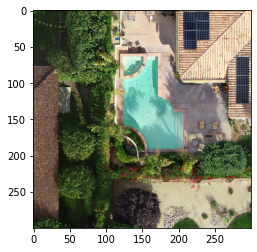

In [0]:
plt.imshow(np.asarray(im))
print(np.asarray(im).shape)

In [0]:
import copy
import math

In [0]:
def prediction(kmodel, crpimg, transform=False):
	# INFO : crpimg should be a cropped image of the right dimension


	imarr = np.array(crpimg).astype(np.float32)

	if transform:
		imarr[:, :, 0] -= 129.1863
		imarr[:, :, 1] -= 104.7624
		imarr[:, :, 2] -= 93.5940
		
		aux = copy.copy(imarr)
		imarr[:, :, 0] = aux[:, :, 2]
		imarr[:, :, 2] = aux[:, :, 0]

	# imarr[:,:,0] -= 129.1863
	# imarr[:,:,1] -= 104.7624
	# imarr[:,:,2] -= 93.5940

	# imarr = imarr.transpose((2, 0, 1))
	imarr = np.expand_dims(imarr, axis=0)

	return kmodel.predict(imarr)

In [0]:
crpim = im 
preds = prediction(fcn16_model, crpim, transform=False)

(1, 300, 300, 21)
<class 'numpy.ndarray'>
300
(300, 300)
(300, 300)


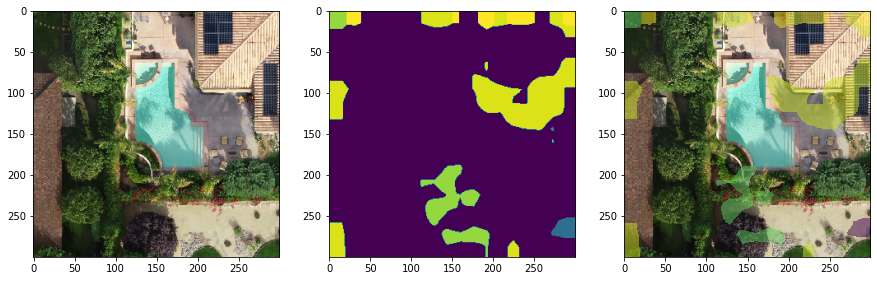

In [0]:
#imperson = preds[0,class2index['person'],:,:]
print(preds.shape)
imclass = np.argmax(preds, axis=3)[0,:,:]
print(type(imclass))
print(len(imclass))
print(imclass.shape)
print(imclass.shape)

plt.figure(figsize = (15, 7))
plt.subplot(1,3,1)
plt.imshow( np.asarray(crpim) )
plt.subplot(1,3,2)
plt.imshow( imclass )
plt.subplot(1,3,3)
plt.imshow( np.asarray(crpim) )
masked_imclass = np.ma.masked_where(imclass == 0, imclass)
#plt.imshow( imclass, alpha=0.5 )
plt.imshow( masked_imclass, alpha=0.5 )

In [0]:
np.unique(imclass)

array([ 0,  7,  9, 15, 16, 18, 19])

In [0]:
# List of dominant classes found in the image
for c in np.unique(imclass):
    print(c, str(description[0,c][0]))

0 background
7 car
9 chair
15 person
16 pottedplant
18 sofa
19 train


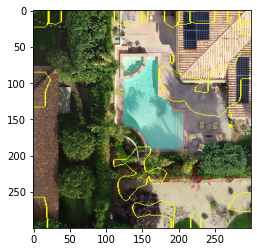

In [0]:
img_test_fcn = imclass
plt.imshow(mark_boundaries(im, img_test_fcn))

# Methods evaluation

In [0]:
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
import cv2

image = plt.imread(image_path)


## Method: Global Thresholding
Adapted Rand error: 0.4602411605650618
Adapted Rand precision: 0.5547345881767156
Adapted Rand recall: 0.5255704137794501
False Splits: 1.5987674133130891
False Merges: 1.4751441499856512

## Method: Local Thresholding
Adapted Rand error: 0.523598226444073
Adapted Rand precision: 0.6033516252191108
Adapted Rand recall: 0.39358784478887593
False Splits: 1.293995873572615
False Merges: 1.8156182877374287

## Method: K-means
Adapted Rand error: 0.7162767510195989
Adapted Rand precision: 0.18263639179846838
Adapted Rand recall: 0.6354198182341547
False Splits: 2.7392097137233
False Merges: 1.2331248884589339

## Method: MeanShift
Adapted Rand error: 0.44669778958581774
Adapted Rand precision: 0.5447617387822543
Adapted Rand recall: 0.5621147326347911
False Splits: 1.2589034822414282
False Merges: 1.5649146810565662

## Method: Mask R-CNN
Adapted Rand error: 0.5283834896018909
Adapted Rand precision: 0.5881806030236025
Adapted Rand recall: 0.39361159465890727

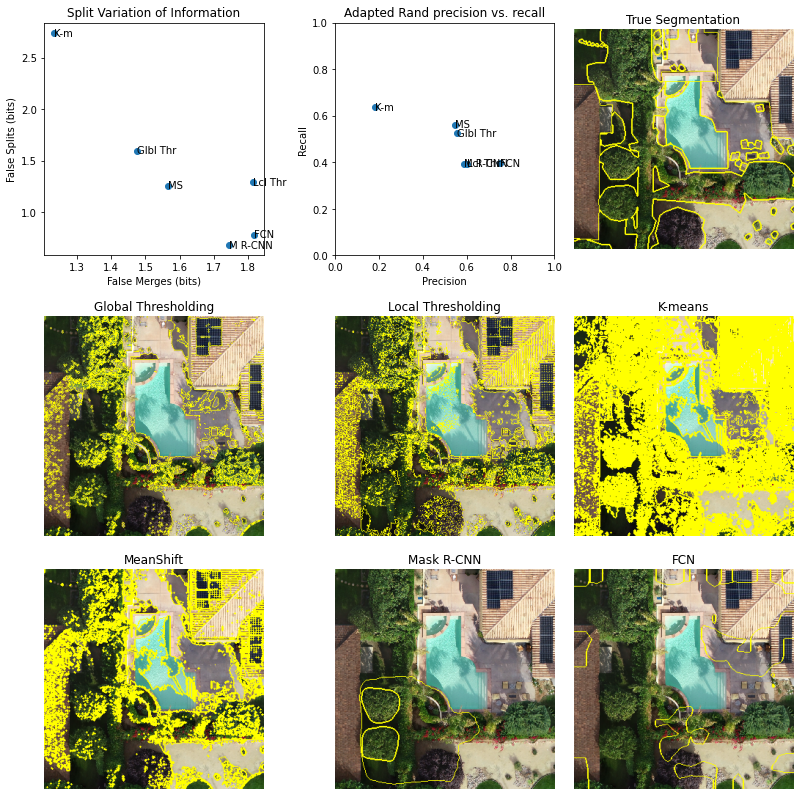

In [0]:
im_true_path = path0+'label-chips/'+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png'
ground_truth = cv2.imread(im_true_path)
im_true = ground_truth[:,:,0]

method_names = ['Global Thresholding', 'Local Thresholding',
                'K-means', 'MeanShift', 'Mask R-CNN', 'FCN']
short_method_names = ['Glbl Thr', 'Lcl Thr', 'K-m', 'MS', 'M R-CNN', 'FCN']

precision_list = []
recall_list = []
split_list = []
merge_list = []

for name, im_test in zip(method_names, [img_test_g_thr, img_test_l_thr,
                                        img_test_kmeans, img_test_meanshift,
                                        img_test_mrcnn, img_test_fcn]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(3, 3, figsize=(11, 11), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, img_test_g_thr))
ax[3].set_title(method_names[0])
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, img_test_l_thr))
ax[4].set_title(method_names[1])
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, img_test_kmeans))
ax[5].set_title(method_names[2])
ax[5].set_axis_off()

ax[6].imshow(mark_boundaries(image, img_test_meanshift))
ax[6].set_title(method_names[3])
ax[6].set_axis_off()

ax[7].imshow(mark_boundaries(image, img_test_mrcnn))
ax[7].set_title(method_names[4])
ax[7].set_axis_off()

ax[8].imshow(mark_boundaries(image, img_test_fcn))
ax[8].set_title(method_names[5])
ax[8].set_axis_off()

plt.show()
